In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


#Create custom dataset
x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


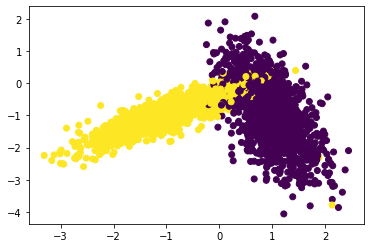

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test) 
plt.show()

In [5]:
from itertools import combinations 
import math

#Implementing Custom RandomSearch Cross Validation Function

def RandomSearchCV(x_train,y_train,classifier, params, folds):   
    """
    Function takes input x,y, classifer model object,model parameters and the cv folds count.
    
    returns the accuracy score for on train and validation portion of the given dataset.
    
    """
    x_indices = np.arange(0,x_train.shape[0]) # generate the indices for x_train data
    x_indices_split = np.split(x_indices,folds) # split the x train indices into 'folds' ex-3 equal folds/arrays
    range_index = [x for x in range (0,folds)] #create a index range for number  of folds ex -3 folds - 0 , 1, 2 . x_indices_split contains x train indicies split into (f) equla folds.
    if folds %2==0:
        combination_folds = list(combinations(range_index, math.floor(folds * 0.8))) # create a combination of fold with 80% data
    else:
        combination_folds = list(combinations(range_index, math.ceil(folds * 0.8))) # create a combination of fold with 80% data
       # create a combination of folds with 80 % points
    trainscores = []
    testscores  = []    
    for k in tqdm(params): # iterate over all k neighbour values
        trainscores_folds = []
        testscores_folds  = []
        for fold in combination_folds: # iterate over all fold [(0, 1), (0, 2), (1, 2)] combinations
            train_indices = []
            test_indices = []
            for f in fold: #create a list of all the train indices
                if fold.index(f) == 0:
                     train_indices = x_indices_split[f]
                else:
                      train_indices = np.append(train_indices,x_indices_split[f])
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]            
            t_indices = [x for x in range_index if x not in fold ] # The inidces which are not in train fold
            count = 0
            for t in t_indices: #create a list of all the test indices
                if count ==0:
                    test_indices = x_indices_split[t]
                    count+=1
                else:
                    test_indices = np.append(test_indices,x_indices_split[t])
            X_test = x_train[test_indices]
            Y_test = y_train[test_indices]
            #print("Train Size {} , Test Size {} , Train folds {} , Test folds {} , K = {}".format(X_train.shape[0],X_test.shape[0],fold,t_indices,k))
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)
            Y_predict = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_predict,Y_test))
            Y_predict =  classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_predict,Y_train))
            trainscores.append(np.mean(np.array(trainscores_folds)))
            testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


classifier = KNeighborsClassifier()

param_range = (1,70)
folds = 6
params = list(sorted(map(int,np.random.uniform(param_range[0],param_range[1],10)))) # Generate 10 samples from the given param range
print("\nRunning K-NN with below set of Ks:\n", params)
print("\nRunning K-NN with {} fold validation\n".format(folds))
trainscores,testscores = RandomSearchCV(X_train,y_train,classifier, params, folds)


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


Running K-NN with below set of Ks:
 [6, 14, 21, 22, 23, 25, 27, 52, 59, 69]

Running K-NN with 6 fold validation



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:32<00:00,  9.20s/it]


In [ ]:
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title("Hyper-parameter VS accuracy plot")
plt.xlabel("Hyper-parameters -K neighbours")
plt.ylabel("Accuracy")
plt.legend()
plt.show()